In [2]:
!pip install simpy

In [1]:
from core.sim import Simulation
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'simpy'

In [2]:
conf1_range = np.arange(0.5, 1.0, 0.1)
conf2_range = np.arange(0.5, 1.0, 0.1)

In [3]:
all_metrics = []

for conf1 in conf1_range:
    for conf2 in conf2_range:
        sim = Simulation(conf1, conf2)
        sim.start()
        
        iteration_metrics = sim.calculate_metrics()
        all_metrics.append({
            'conf1': conf1,
            'conf2': conf2,
            'metrics': iteration_metrics,
            'data': sim.data
        })

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:

config_labels = []
elapsed_times_vals = []

for config in all_metrics:
    conf1 = round(config['conf1'],1)
    conf2 = round(config['conf2'],1)
    
    label = f"({(conf1)},{conf2})"  
    
    items = config['data']
    for item in items:
        config_labels.append(label)  
        elapsed_times_vals.append(item.elapsed)

unique_labels = sorted(set(config_labels), key=config_labels.index)
label_positions = range(len(unique_labels))

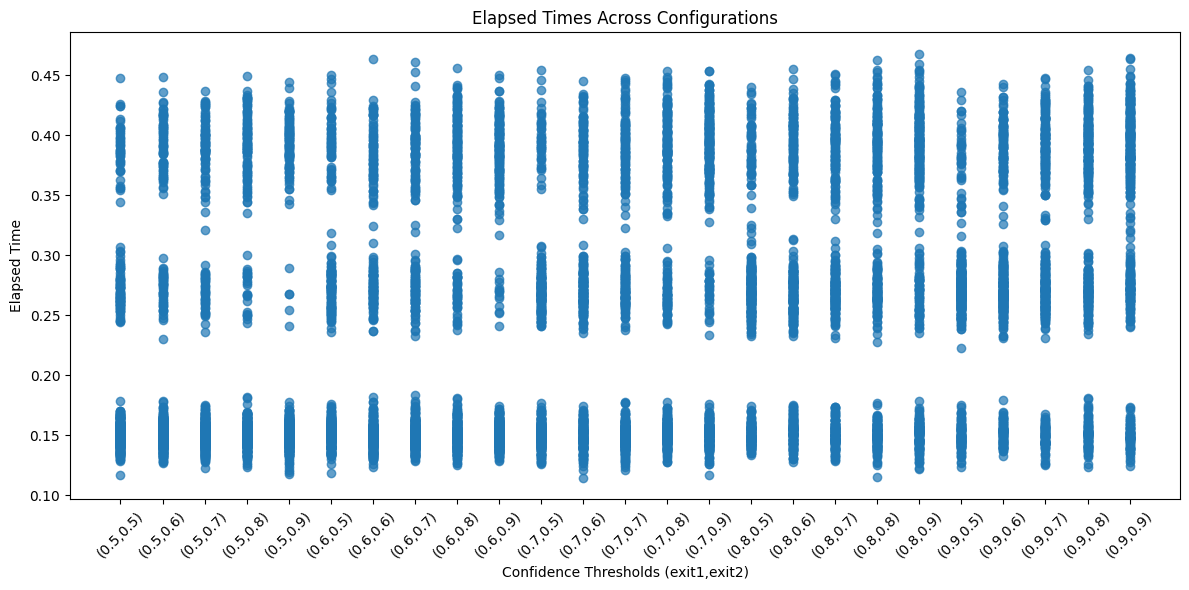

In [5]:
label_to_position = {label: pos for pos, label in enumerate(unique_labels)}
positions = [label_to_position[label] for label in config_labels]

plt.figure(figsize=(12, 6))
plt.scatter(positions, elapsed_times_vals, alpha=0.7)
plt.xticks(label_positions, unique_labels, rotation=45)  
plt.ylabel('Elapsed Time')
plt.xlabel('Confidence Thresholds (exit1,exit2)')
plt.title('Elapsed Times Across Configurations')
plt.tight_layout()  
plt.show()

In [11]:
plt.set_cmap('plasma')

<Figure size 640x480 with 0 Axes>

0.725
0.7325
0.75
0.7325
0.7625
0.74
0.745
0.7775
0.7575
0.7625
0.755
0.81
0.7875
0.7875
0.7625
0.78
0.775
0.7925
0.7975
0.7925
0.7875
0.79
0.775
0.825
0.815


C:\Users\Blues\AppData\Local\Temp\ipykernel_57044\1341749875.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.round(conf2_range, 2)))
C:\Users\Blues\AppData\Local\Temp\ipykernel_57044\1341749875.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.round(conf1_range, 2)))


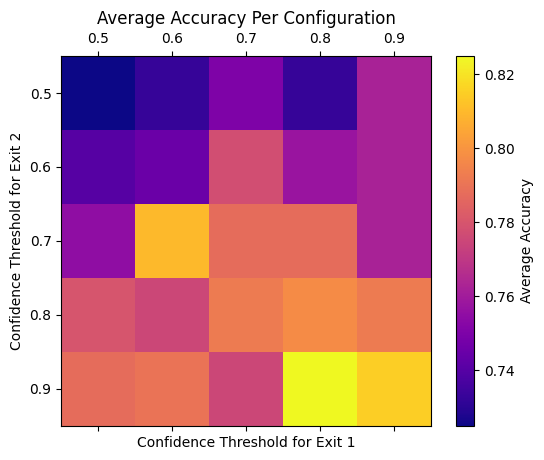

In [12]:
acc_matric = np.zeros((len(conf1_range), len(conf2_range)))
for metric in all_metrics:
    conf1 = metric['conf1']
    conf2 = metric['conf2']
    correct = []
    # print(metric['metrics'][1]['accuracy'])
    for item in metric['data']:
        # if item.exit_num == 2:
        logit,label, yhat = item.logit,item.label, item.yhat
        # print(logit,label, yhat)
        correct.append(1 if label == yhat else 0)
            
    print(np.sum(correct)/len(correct))
    i = np.where(conf1_range == conf1)[0][0]
    j = np.where(conf2_range == conf2)[0][0]
    
    acc_matric[i, j] = np.mean(correct)


# Create a heatmap for averages
fig, ax = plt.subplots()
cax = ax.matshow(acc_matric, interpolation='nearest')
fig.colorbar(cax, label='Average Accuracy')
ax.set_xticklabels([''] + list(np.round(conf2_range, 2)))
ax.set_yticklabels([''] + list(np.round(conf1_range, 2)))

ax.set_xlabel('Confidence Threshold for Exit 1')
ax.set_ylabel('Confidence Threshold for Exit 2')
ax.set_title('Average Accuracy Per Configuration')
# ax.set_cmap("plasma")
plt.show()


C:\Users\Blues\AppData\Local\Temp\ipykernel_57044\1918260662.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.round(conf2_range, 2)))
C:\Users\Blues\AppData\Local\Temp\ipykernel_57044\1918260662.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.round(conf1_range, 2)))


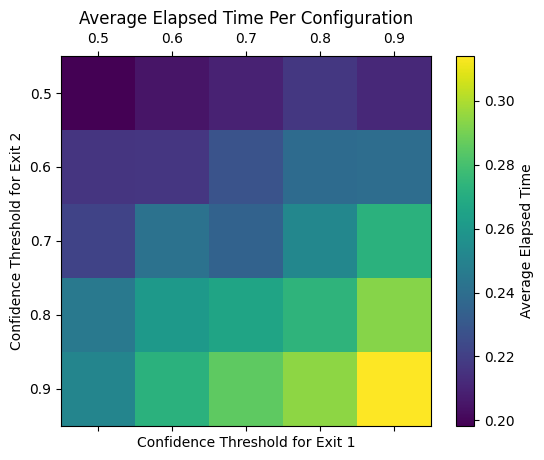

In [7]:
avg_elapsed_times_matrix = np.zeros((len(conf1_range), len(conf2_range)))

for metric in all_metrics:
    conf1 = metric['conf1']
    conf2 = metric['conf2']
    times = []
    accuracies = []
    for item in metric['data']:
        times.append(item.elapsed)
    elapsed_times = np.mean(times)
    
    i = np.where(conf1_range == conf1)[0][0]
    j = np.where(conf2_range == conf2)[0][0]
    
    avg_elapsed_times_matrix[i, j] = np.mean(elapsed_times)

# Create a heatmap
fig, ax = plt.subplots()
cax = ax.matshow(avg_elapsed_times_matrix, interpolation='nearest')
fig.colorbar(cax, label='Average Elapsed Time')

ax.set_xticklabels([''] + list(np.round(conf2_range, 2)))
ax.set_yticklabels([''] + list(np.round(conf1_range, 2)))

ax.set_xlabel('Confidence Threshold for Exit 1')
ax.set_ylabel('Confidence Threshold for Exit 2')
ax.set_title('Average Elapsed Time Per Configuration')

plt.show()

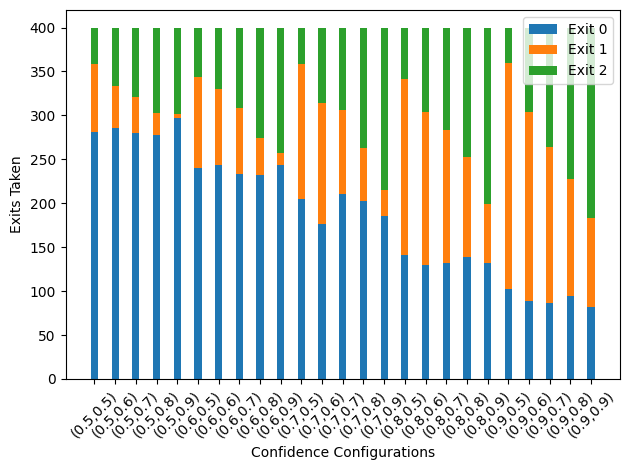

In [10]:
from collections import Counter
config_labels = []
exit_num_counts = []

for config in all_metrics:
    conf1 = round(config['conf1'],1)
    conf2 = round(config['conf2'],1)
    
    label = f"({(conf1)},{conf2})" 
    
    items = config['data']

    config_labels.append(label)  
    counter = Counter(item.exit_num for item in items)
    exit_num_counts.append(counter)

unique_labels = sorted(set(config_labels), key=config_labels.index)
label_positions = range(len(unique_labels))

label_to_position = {label: pos for pos, label in enumerate(unique_labels)}
positions = [label_to_position[label] for label in config_labels]
all_exit_nums = sorted(set().union(*exit_num_counts))

freq_matrix = np.zeros((len(all_metrics), len(all_exit_nums)))

for i, counts in enumerate(exit_num_counts):
    for j, exit_num in enumerate(all_exit_nums):
        freq_matrix[i, j] = counts.get(exit_num, 0)

bar_width = 0.35 
index = np.arange(len(all_metrics))

fig, ax = plt.subplots()
for i, exit_num in enumerate(all_exit_nums):
    bottoms = np.sum(freq_matrix[:, :i], axis=1) if i > 0 else None
    ax.bar(index, freq_matrix[:, i], bar_width, bottom=bottoms, label=f'Exit {exit_num}')

ax.set_xlabel('Confidence Configurations')
ax.set_ylabel('Exits Taken')
ax.set_xticks(label_positions, unique_labels,rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# # Convert labels to categorical data for plotting
# unique_labels = sorted(set(config_labels), key=config_labels.index)
# label_positions = range(len(unique_labels))

# # Convert config labels to positions for plotting
# label_to_position = {label: pos for pos, label in enumerate(unique_labels)}
# positions = [label_to_position[label] for label in config_labels]

# plt.figure(figsize=(12, 6))
# plt.bar(positions, elapsed_times_vals, alpha=0.7)
# plt.xticks(label_positions, unique_labels, rotation=45)  # Set custom ticks based on config labels
# plt.ylabel('Elapsed Time')
# plt.xlabel('Confidence Thresholds (exit1,exit2)')
# plt.title('Elapsed Times Across Configurations')
# plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
# plt.show()


In [2]:
sim = Simulation(0.8, 0.8)
sim.start()

Files already downloaded and verified


In [3]:
metrics = sim.calculate_metrics()

for exit_num, metrics in metrics.items():
    print(f"Exit {exit_num}:")
    print(f"  Accuracy: {metrics['accuracy']:.2f}%")
    print(f"  Items Processed: {metrics['total_items']}")
    print(f"  Average Elapsed Time: {metrics['average_elapsed_time']:.4f} seconds")

Exit 2:
  Accuracy: 60.99%
  Items Processed: 405
  Average Elapsed Time: 0.3813 seconds
Exit 1:
  Accuracy: 90.91%
  Items Processed: 264
  Average Elapsed Time: 0.2706 seconds
Exit 0:
  Accuracy: 92.75%
  Items Processed: 331
  Average Elapsed Time: 0.1496 seconds
